# 2020AIML003 Unsupervised Learning Assignment1

In [1]:
# Import the required libraries for data frame loading, analysis, pre-processing, visualisation & modeling etc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# read the input dataset present in "cricketers.csv" using the read_csv method of the pandas dataframe
dataset = pd.read_csv("cricketers.csv")

In [3]:
# lets perform some exploratory data analysis...
# inspect the first 5 rows using the head method of the dataframe object
dataset.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [4]:
# lets perform some exploratory data analysis...
# inspect the first 5 rows using the head method of the dataframe object
dataset.tail()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
104,Anureet Singh,0,0,0,0,0,0.0,0.0,3,4.0,42,1,42.00,10.50
105,Avesh Khan,0,0,0,0,0,0.0,0.0,6,19.0,204,4,51.00,10.73
106,Barinder Sran,0,0,0,0,0,0.0,0.0,6,22.0,229,4,57.25,10.40
107,Basil Thampi,0,0,0,0,0,0.0,0.0,4,10.1,114,5,22.80,10.20
108,Ben Laughlin,0,0,0,0,0,0.0,0.0,7,21.0,212,9,22.44,10.04


In [5]:
# inspect how many rows x columns are there in the input data, using the shape variable of the dataframe
dataset.shape

(109, 14)

In [6]:
# Lets check using the info method to see nature of columns, any indication of NULL/NaN/missing values etc in any columns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLAYER                   109 non-null    object 
 1   matches_played           109 non-null    int64  
 2   innings_batted           109 non-null    int64  
 3   runs_scored              109 non-null    int64  
 4   highest_runs             109 non-null    int64  
 5   balls_faced              109 non-null    int64  
 6   average_runs             109 non-null    float64
 7   strike_rate              109 non-null    float64
 8   innings_bowled           109 non-null    int64  
 9   overs                    109 non-null    float64
 10  runs_given               109 non-null    int64  
 11  wickets_obtained         109 non-null    int64  
 12  average_runs_per_wicket  109 non-null    float64
 13  bowling_economy          109 non-null    float64
dtypes: float64(5), int64(8), o

In [7]:
# we see no missing data, NaN, NULL etc...
# lets see some statistics about the data 
dataset.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


In [8]:
# as it is a pre-requisite to normalise data before we do K-Means (as it is a distance based algorithm)
# Let's use a standard scaler to normalize all numerical attributes
from sklearn.preprocessing import StandardScaler
cols = ['matches_played', 'innings_batted', 'runs_scored',
       'highest_runs', 'balls_faced', 'average_runs', 'strike_rate',
       'innings_bowled', 'overs', 'runs_given', 'wickets_obtained',
       'average_runs_per_wicket', 'bowling_economy']
scaler = StandardScaler()
scaledarray = scaler.fit_transform(dataset[cols])
scaleddf = pd.DataFrame(scaledarray, columns = cols)
firstcol = dataset['PLAYER']
firstcoldf = pd.DataFrame(firstcol, columns = ['PLAYER'])
frames = [firstcoldf, scaleddf]
dataset = pd.concat(frames, axis=1)

In [9]:
# inspect the first 5 rows using the head method of the normalized dataframe object
dataset.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,0.085717,0.223846,-0.218342,0.084349,-0.200401,-0.350205,0.449633,-0.832122,-0.758809,-0.788506,-0.704155,-0.79481,-1.083832
1,AB de Villiers,0.475017,0.627139,1.687804,1.566174,1.221188,1.933268,1.081234,-0.832122,-0.758809,-0.788506,-0.704155,-0.79481,-1.083832
2,Abhishek Sharma,-1.276831,-0.986033,-0.609488,0.084349,-0.744667,2.536909,1.419576,-0.832122,-0.758809,-0.788506,-0.704155,-0.79481,-1.083832
3,Ajinkya Rahane,1.058966,1.232079,1.081804,0.724228,1.529876,0.380781,-0.083732,-0.832122,-0.758809,-0.788506,-0.704155,-0.79481,-1.083832
4,Alex Hales,-0.692881,-0.381094,-0.141215,0.050671,-0.054181,0.143570,0.065379,-0.832122,-0.758809,-0.788506,-0.704155,-0.79481,-1.083832


In [10]:
# lets perform some exploratory data analysis...
# inspect the first 5 rows using the head method of the normalized dataframe object
dataset.tail()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
104,Anureet Singh,-1.86078,-1.590973,-0.95656,-1.464832,-1.012738,-1.395808,-2.528443,-0.279065,-0.540360,-0.512381,-0.524826,1.130906,1.126002
105,Avesh Khan,-1.86078,-1.590973,-0.95656,-1.464832,-1.012738,-1.395808,-2.528443,0.273991,0.278823,0.552672,0.013162,1.543559,1.174407
106,Barinder Sran,-1.86078,-1.590973,-0.95656,-1.464832,-1.012738,-1.395808,-2.528443,0.273991,0.442660,0.717032,0.013162,1.830124,1.104956
107,Basil Thampi,-1.86078,-1.590973,-0.95656,-1.464832,-1.012738,-1.395808,-2.528443,-0.094713,-0.207226,-0.039024,0.192491,0.250579,1.062863
108,Ben Laughlin,-1.86078,-1.590973,-0.95656,-1.464832,-1.012738,-1.395808,-2.528443,0.458343,0.388047,0.605267,0.909808,0.234072,1.029190


In [11]:
# inspect how many rows x columns are there in the input data, using the shape variable of the normalized dataframe
dataset.shape

(109, 14)

In [12]:
# Lets check using the info method to see nature of columns, any indication of NULL/NaN/missing values etc in any columns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLAYER                   109 non-null    object 
 1   matches_played           109 non-null    float64
 2   innings_batted           109 non-null    float64
 3   runs_scored              109 non-null    float64
 4   highest_runs             109 non-null    float64
 5   balls_faced              109 non-null    float64
 6   average_runs             109 non-null    float64
 7   strike_rate              109 non-null    float64
 8   innings_bowled           109 non-null    float64
 9   overs                    109 non-null    float64
 10  runs_given               109 non-null    float64
 11  wickets_obtained         109 non-null    float64
 12  average_runs_per_wicket  109 non-null    float64
 13  bowling_economy          109 non-null    float64
dtypes: float64(13), object(1)


In [13]:
# lets see some statistics about the normalized data 
dataset.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-1.425975e-16,4.481634e-17,3.463081e-17,-1.588943e-16,-1.629685e-17,-8.555847e-17,-1.385232e-16,1.186615e-16,-3.972358e-17,1.018553e-17,-1.324119e-17,7.817396e-17,-5.703898e-17
std,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-1.860780e+00,-1.590973e+00,-9.565604e-01,-1.464832e+00,-1.012738e+00,-1.395808e+00,-2.528443e+00,-8.321217e-01,-7.588094e-01,-7.885062e-01,-7.041550e-01,-7.948098e-01,-1.083832e+00
25%,-8.875311e-01,-7.843867e-01,-7.582331e-01,-7.912747e-01,-7.446668e-01,-6.592040e-01,-2.723433e-01,-8.321217e-01,-7.588094e-01,-7.885062e-01,-7.041550e-01,-7.948098e-01,-1.083832e+00
50%,8.571729e-02,-1.794470e-01,-4.111603e-01,-1.177180e-01,-3.953620e-01,-7.491462e-02,1.654752e-01,-4.634174e-01,-5.949727e-01,-6.109973e-01,-7.041550e-01,-7.948098e-01,4.483192e-01
75%,8.643160e-01,1.030433e+00,4.758036e-01,6.231945e-01,5.144551e-01,4.769142e-01,4.918227e-01,6.426956e-01,6.611086e-01,6.775857e-01,3.718202e-01,5.055066e-01,8.587169e-01
max,1.448265e+00,1.837019e+00,3.092623e+00,2.845932e+00,3.178919e+00,3.337810e+00,3.675882e+00,2.301865e+00,2.954822e+00,2.715651e+00,3.599746e+00,4.157030e+00,2.388764e+00


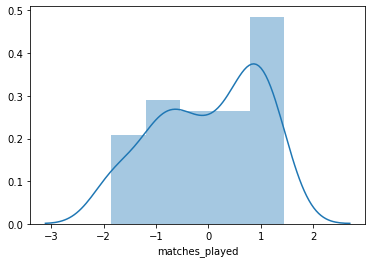

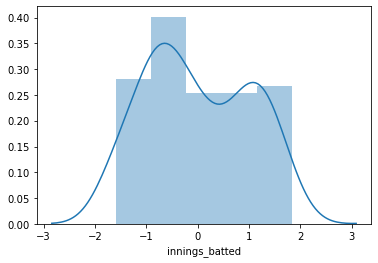

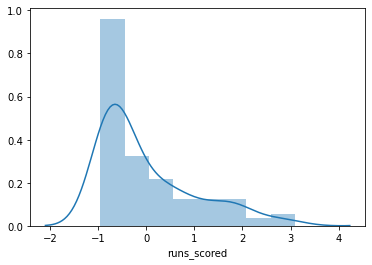

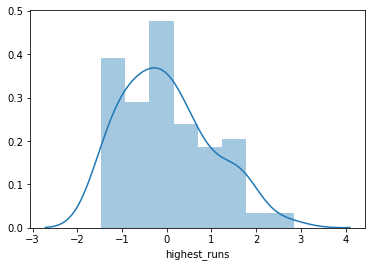

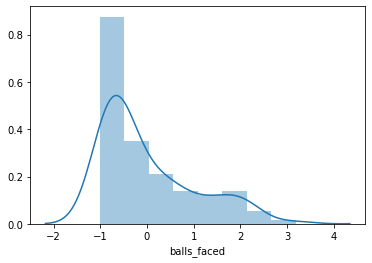

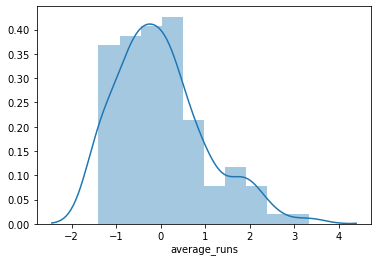

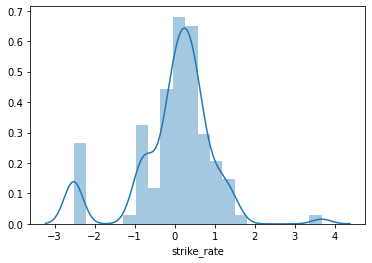

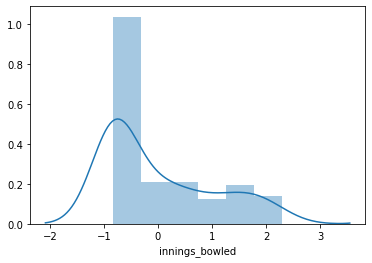

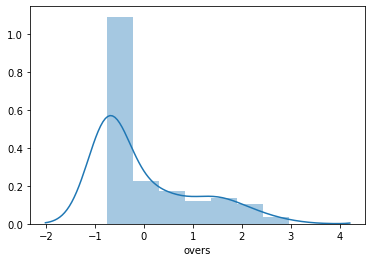

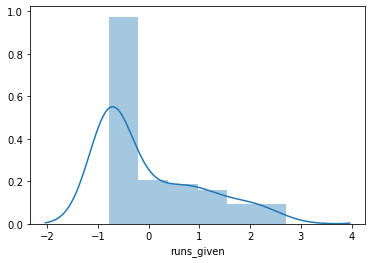

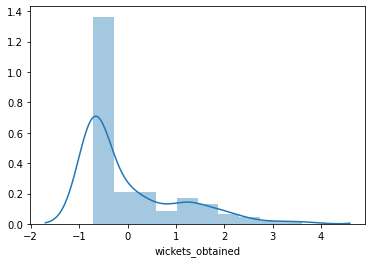

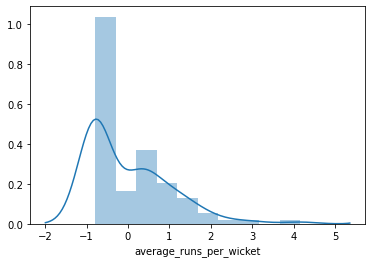

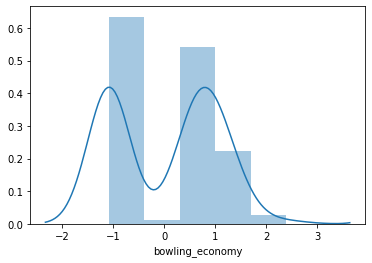

In [14]:
# lets see the histograms of all the normalized numerical attributes 
for (columnName, columnData) in dataset.iteritems():
    if (dataset[columnName].dtype!='object'):
        sns.distplot(dataset[columnName])
        plt.show()

In [15]:
# Now let's prepare to analyse the two attributes viz. 'average_runs' and 'bowling_economy'
ar = dataset['average_runs']
be = dataset['bowling_economy']
ardf = pd.DataFrame(ar, columns = ['average_runs'])
bedf = pd.DataFrame(be, columns = ['bowling_economy'])
frames = [ardf, bedf]
dataset = pd.concat(frames, axis=1)

# Lets implement our own KMeans method/function

In [16]:
from sklearn.metrics import pairwise_distances
class KMeansCustom:
    def __init__(self, k, max_iter = 500):
        self.k = k
        self.max_iter = max_iter       

    def assign_clusters(self, data):
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        return  self.cluster_labels

    def fit(self, data):
        self.centroids=data.sample(self.k)
        for iter in range(self.max_iter):
            dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
            self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
            self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        return self
    
    def predict(self, data):
        return self.assign_clusters(data)
    
    def fit_predict(self, data):
        self.fit(data)
        self.predict(data)
        return  self.cluster_labels

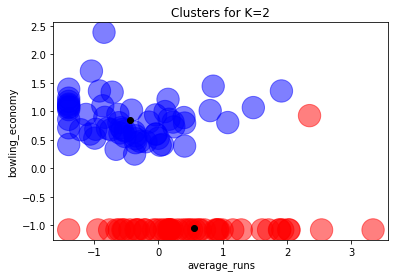

In [17]:
km=KMeansCustom(2)
km.fit_predict(dataset)
label_map = {0:'r', 1:'b'}
label_color = [label_map[i] for i in km.cluster_labels]
plt.scatter(ar,be, c=label_color, s=500, alpha=0.5)
plt.scatter(km.centroids[:,0], km.centroids[:,1], color='black')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.title('Clusters for K=2')
plt.show()

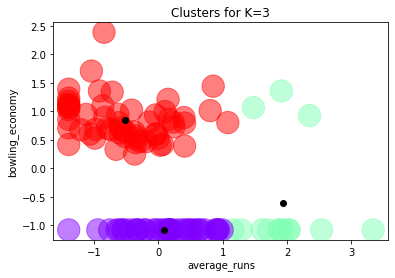

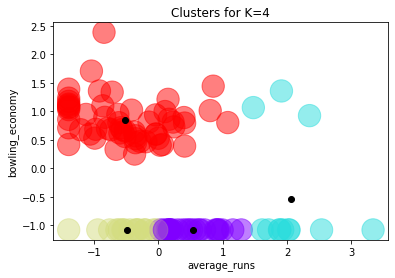

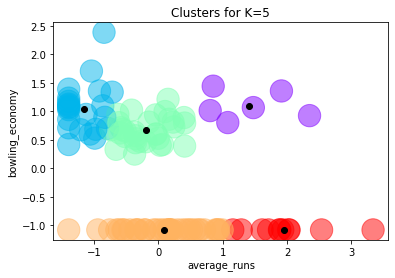

In [18]:
for i in range (3,6):
    km=KMeansCustom(i)
    km.fit_predict(dataset)
    plt.scatter(ar,be, c=km.cluster_labels, cmap='rainbow', s=500, alpha=0.5)
    plt.scatter(km.centroids[:,0], km.centroids[:,1], color='black')
    plt.xlabel('average_runs')
    plt.ylabel('bowling_economy')
    plt.title('Clusters for K='+str(i))
    plt.show()

# Now we will use the standard sklearn KMeans library function
# to cross check the results obtained

C:\Users\sudhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


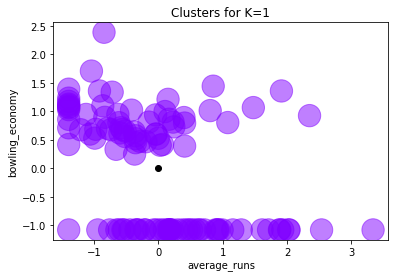

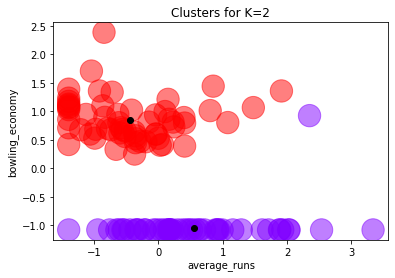

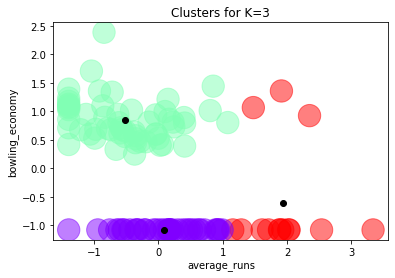

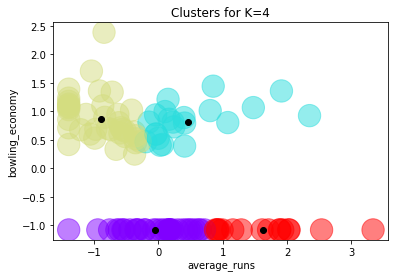

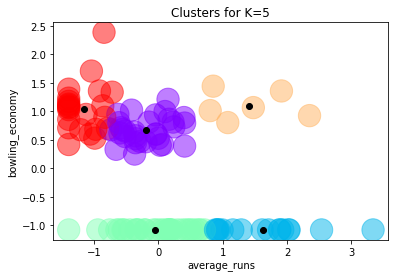

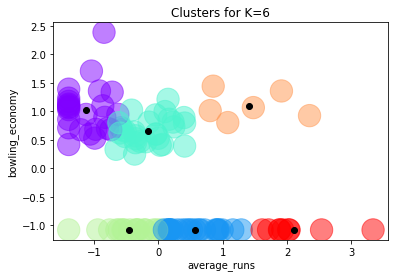

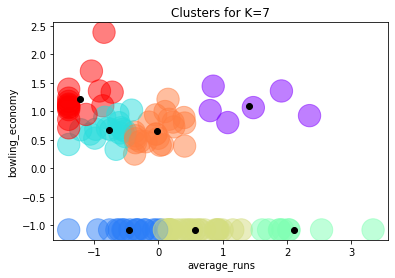

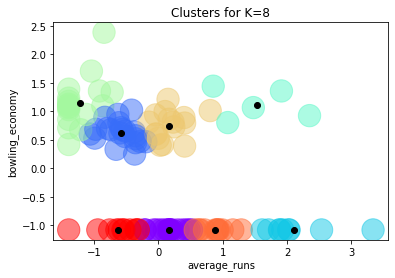

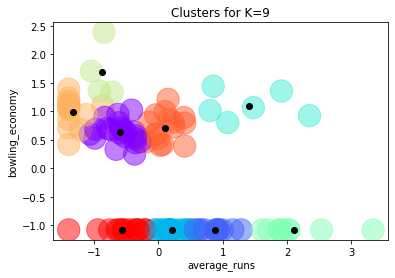

In [19]:
from sklearn.cluster import KMeans

error=[]
for i in range (1,10):
    km=KMeans(i)
    kmfit=km.fit_predict(dataset)
    error.append(km.inertia_)
    plt.scatter(ar,be, c=kmfit, cmap='rainbow', s=500, alpha=0.5)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
    plt.xlabel('average_runs')
    plt.ylabel('bowling_economy')
    plt.title('Clusters for K='+str(i))
    plt.show()

# based on the squared sum errors lets check where the elbow
# of the curve is, to find the optimal K value

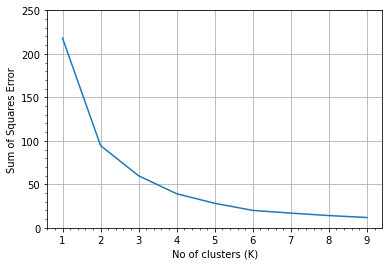

In [29]:
plt.plot(range(1, 10), error)
plt.xlabel('No of clusters (K)')
plt.ylabel('Sum of Squares Error')
plt.minorticks_on()
plt.ylim((0,250))
plt.grid()
plt.show()